<a href="https://colab.research.google.com/github/hits-sdo/hits-sdo-similaritysearch/blob/david_byol_losses/search_byol/byol_train_pl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook to Intialize HITS-SDO self-similarity search environment
- Run all cells to initalize environment, and restart runtime if prompted to use updated versions. You will need to rerun the cells again to ensure that all dependencies have been installed.

# Download and Unzip Data

In [1]:
# Download Data - Uncomment the one you want

# 171 with false yellow colors - https://drive.google.com/file/d/15C5spf1la7L09kvWXll2qt67Ec0rwLsY/view?usp=drive_link
# !gdown 15C5spf1la7L09kvWXll2qt67Ec0rwLsY


# 171 grayscale - https://drive.google.com/file/d/16WD0td1f5gx4yIIDkWWSTb-oZcezI1CU/view?usp=drive_link
# !gdown 16WD0td1f5gx4yIIDkWWSTb-oZcezI1CU


# Multiwavelength r:211 g:193 b:171 https://drive.google.com/file/d/1DMIatOmA4XcoWeW0oAUkZujx8YrhLkpY/view?usp=sharing
!gdown 1DMIatOmA4XcoWeW0oAUkZujx8YrhLkpY
# Multiwavelength r:211 g:193 b:171active cycle extension https://drive.google.com/file/d/1-BPQpdQWNwZzoVpg3lQ143cr3_UPE36M/view?usp=sharing
!gdown 1-BPQpdQWNwZzoVpg3lQ143cr3_UPE36M

# Multiwavelength r:304 g:211 b:171 https://drive.google.com/file/d/1Pts431S-fdSfJJ6pt79-fkNYazXqO9O7/view?usp=sharing
# !gdown 1Pts431S-fdSfJJ6pt79-fkNYazXqO9O7
# Multiwavelength r:304 g:211 b:171 active cycle extension https://drive.google.com/file/d/1Sbbgi6HzJkuCTUF8tJTLeddpGIjGXTcj/view?usp=sharing
# !gdown 1Sbbgi6HzJkuCTUF8tJTLeddpGIjGXTcj


# Multiwavelength r:335 g:193 b:94 https://drive.google.com/file/d/1v0IYSzwiQcHPcnSsTAeU7bI8c4310b35/view?usp=sharing
# !gdown 1v0IYSzwiQcHPcnSsTAeU7bI8c4310b35
# Multiwavelength r:335 g:193 b:94 active cycle extension https://drive.google.com/file/d/1uSt8BzpVj5GgM9SwSsDcQMEE4lv1uTJo/view?usp=sharing
# !gdown 1uSt8BzpVj5GgM9SwSsDcQMEE4lv1uTJo

Downloading...
From: https://drive.google.com/uc?id=1DMIatOmA4XcoWeW0oAUkZujx8YrhLkpY
To: /content/AIA211_193_171_Miniset.tar.gz
100% 121M/121M [00:00<00:00, 239MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1-BPQpdQWNwZzoVpg3lQ143cr3_UPE36M
To: /content/AIA211_193_171_Miniset_ext.tar.gz
100% 175M/175M [00:00<00:00, 232MB/s]


In [2]:
# Unzip file make them match the cell above

# 171 with false yellow colors
# !tar -zxf aia_171_color_1perMonth.tar.gz


# 171 grayscale
# !tar -zxf AIA171_Miniset_BW.tar.gz


# Multiwavelength r:211 g:193 b:171
!tar -zxf AIA211_193_171_Miniset.tar.gz
# Multiwavelength r:211 g:193 b:171active cycle extension
!tar -zxf AIA211_193_171_Miniset_ext.tar.gz


# Multiwavelength r:304 g:211 b:171
# !tar -zxf AIA304_211_171_Miniset.tar.gz
# Multiwavelength r:304 g:211 b:171 active cycle extension
# !tar -zxf AIA304_211_171_Miniset_ext.tar.gz


# Multiwavelength r:335 g:193 b:94
# !tar -zxf AIA335_193_94_Miniset.tar.gz
# Multiwavelength r:335 g:193 b:94 active cycle extension
# !tar -zxf AIA335_193_94_Miniset_ext.tar.gz

In [3]:
# Print some files to see that they exist - match cells above

# 171 with false yellow colors
# !du aia_171_color_1perMonth/. -l -h

# 171 grayscale
# !du AIA171_Miniset_BW/. -l -h

# Multiwavelength r:211 g:193 b:171
# !du AIA211_193_171_Miniset/. -l -h

# Multiwavelength r:304 g:211 b:171
# !du AIA304_211_171_Miniset/. -l -h

# Multiwavelength r:335 g:193 b:94
# !du AIA335_193_94_Miniset/. -l -h

# Clone repository

In [4]:
# Clone the repository from GitHub
!git clone https://github.com/hits-sdo/hits-sdo-similaritysearch

fatal: destination path 'hits-sdo-similaritysearch' already exists and is not an empty directory.


In [5]:
%cd hits-sdo-similaritysearch/

/content/hits-sdo-similaritysearch


# Switch to Desired Branch

In [6]:
# Switch to the desired branch with requirements.txt
!git checkout byol_losses

Already on 'byol_losses'
Your branch is up to date with 'origin/byol_losses'.


In [7]:
# Confirm that branch is up to date
# !git log --oneline

# Install all necessary packages into environment

In [8]:
!pip install -q -r requirements.txt

  Preparing metadata (setup.py) ... done


# Install packages not in 'requirements.txt'

In [9]:
# Extra installs

# For plotting and umap [https://umap-learn.readthedocs.io/en/latest/plotting.html]

!pip install -q hdbscan seaborn umap-learn datashader bokeh holoviews sklearn

# Load Modules

In [10]:
import copy
import numpy as np
from tqdm.autonotebook import tqdm

import torch
import torchvision
from torch import nn
import pytorch_lightning as pl
from pytorch_lightning.loggers import WandbLogger
torch.set_float32_matmul_precision("high")

import wandb
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
import matplotlib
import umap
import hdbscan
import seaborn as sns

from lightly.data import LightlyDataset
from lightly.data.multi_view_collate import MultiViewCollate
from lightly.loss import NegativeCosineSimilarity, NTXentLoss
from lightly.models.modules import BYOLPredictionHead, BYOLProjectionHead
from lightly.models.utils import deactivate_requires_grad, update_momentum
from lightly.transforms.simclr_transform import SimCLRTransform
from lightly.utils.scheduler import cosine_schedule

from search_byol.dataset import SDOTilesDataset

device = "cuda" if torch.cuda.is_available() else "cpu"

<ipython-input-10-b460c2f4cfc5>:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


# Login to Wanddb and initialize logger

In [11]:
!wandb login --relogin

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


# Define run parameters and initalize Wandb

Set dataset type and data path.

In [12]:
# Set data type and data path.  Make sure it matches cells above

# 171 with false yellow colors
# data_type = '171Color'
# data_path = '/content/aia_171_color_1perMonth'

# 171 grayscale
# data_type = '171gray'
# data_path = '/content/AIA171_Miniset_BW'

# Multiwavelength r:211 g:193 b:171
# data_type = 'r:211 g:193 b:171'
data_type = 'r:211 g:193 b:171 extended'
data_path = '/content/AIA211_193_171_Miniset'

# Multiwavelength r:304 g:211 b:171
# data_type = 'r:304 g:211 b:171'
# data_type = 'r:304 g:211 b:171 extended'
# data_path = '/content/AIA304_211_171_Miniset'

# Multiwavelength r:335 g:193 b:94
# data_type = 'r:335 g:193 b:94'
# data_type = 'r:335 g:193 b:94 extended'
# data_path = '/content/AIA335_193_94_Miniset'

Set training and wandb parameters.

In [13]:
seed = 42 #
pl.seed_everything(seed, workers=True)

initial = "DNS"
job_type = "DNS"
epochs = 5
data_stride = 5
batch_size = 128
augmentation = 'double'
loss = 'contrast'   # 'contrast' or 'cos'
learning_rate = 0.1
cosine_scheduler_start = .1
cosine_scheduler_end = 1.0
projection_size = 6
prediction_size = 6

notes = ""
name = f"{initial}-ds{data_stride}_bs{batch_size}_lr{learning_rate}_{augmentation}aug_ss{cosine_scheduler_start}_se{cosine_scheduler_end}_pjs{projection_size}_pds{prediction_size}_{loss}"
group = "clustering"
tags = ["experimentation"]

wandb_logger = WandbLogger(
    # set the wandb project where this run will be logged
    project="search-byol-for_real",

    # track hyperparameters and run metadata
    config={
    "seed": seed,
    "data_type": data_type,
    "batch size": batch_size,
    "augmention": augmentation,
    "data stride": data_stride,
    "learning_rate": learning_rate,
    "cosine_scheduler_start": cosine_scheduler_start,
    "cosine_scheduler_end": cosine_scheduler_end
    },
    entity = "search-byol",
    job_type = job_type,
    name = name,
    notes = notes,
    group = group,
    tags = tags,

)

INFO:lightning_fabric.utilities.seed:Global seed set to 42
wandb: Currently logged in as: wovenbone (search-byol). Use `wandb login --relogin` to force relogin


## Define BYOL Model

In [14]:
class BYOL(pl.LightningModule):
    def __init__(self, lr=0.1, projection_size=256, prediction_size=256, cosine_scheduler_start=0.1, cosine_scheduler_end=1.0, epochs=10, loss='cos'):
        super().__init__()

        resnet = torchvision.models.resnet18() # Play w/ resnet.

        self.backbone = nn.Sequential(*list(resnet.children())[:-1])
        self.projection_head = BYOLProjectionHead(512, 1024, projection_size)
        self.prediction_head = BYOLPredictionHead(projection_size, 1024, prediction_size)

        self.backbone_momentum = copy.deepcopy(self.backbone)
        self.projection_head_momentum = copy.deepcopy(self.projection_head)

        deactivate_requires_grad(self.backbone_momentum)
        deactivate_requires_grad(self.projection_head_momentum)

        self.loss = loss
        self.loss_cos = NegativeCosineSimilarity()
        self.loss_contrast = NTXentLoss()

        self.cosine_scheduler_start = cosine_scheduler_start
        self.cosine_scheduler_end = cosine_scheduler_end
        self.epochs = epochs
        self.lr = lr

    def forward(self, x):
        y = self.backbone(x).flatten(start_dim=1)
        z = self.projection_head(y) #
        p = self.prediction_head(z) #
        return p

    def forward_momentum(self, x):
        y = self.backbone_momentum(x).flatten(start_dim=1)
        z = self.projection_head_momentum(y)
        z = z.detach()
        return z

    def training_step(self, batch, batch_idx):

        momentum = cosine_schedule(self.current_epoch, self.epochs, self.cosine_scheduler_start, self.cosine_scheduler_end)
        update_momentum(self.backbone, self.backbone_momentum, m=momentum)
        update_momentum(self.projection_head, self.projection_head_momentum, m=momentum)

        (x0, x1, _) = batch #

        p0 = self.forward(x0)
        z0 = self.forward_momentum(x0) #
        p1 = self.forward(x1)
        z1 = self.forward_momentum(x1) #

        #
        loss_cos = 0.5 * (self.loss_cos(p0, z1) + self.loss_cos(p1, z0))
        loss_contrast = 0.5 * (self.loss_contrast(p0, z1) + self.loss_contrast(p1, z0))

        #
        if self.loss == 'cos':
            loss = loss_cos
        else:
            loss = loss_contrast
        self.log('loss cos', loss_cos)
        self.log('loss contrast', loss_contrast)
        self.log('loss', loss)
        return loss

    #
    def configure_optimizers(self):
        return torch.optim.SGD(self.parameters(), lr=self.lr) # Play w/ optimizers.


## Initialize Model.

In [15]:
model = BYOL(lr=learning_rate, projection_size=projection_size, prediction_size=prediction_size, cosine_scheduler_start=cosine_scheduler_start, cosine_scheduler_end=cosine_scheduler_end, loss=loss)

## Initialize Dataloader

In [16]:
# Grab dataset.
dataset = SDOTilesDataset(data_path=data_path, augmentation=augmentation, data_stride=data_stride)

# Init dataloader w/ dataset.
dataloader = torch.utils.data.DataLoader(
    dataset,
    batch_size=batch_size,
    shuffle=True,
    drop_last=False,
    num_workers=8,
)

# Run training loop and log in Wandb

Init trainer and train model.

In [17]:
trainer = pl.Trainer(max_epochs=epochs,
                     accelerator="auto", devices="auto", strategy="auto",
                     logger=wandb_logger, log_every_n_steps=10, deterministic=True)

wandb_logger.watch(model)

trainer.fit(model=model, train_dataloaders=dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
wandb: logging graph, to disable use `wandb.watch(log_graph=False)`
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name                     | Type                     | Params
----------------------------------------------------------------------
0 | backbone                 | Sequential               | 11.2 M
1 | projection_head          | BYOLProjectionHead       | 530 K 
2 | prediction_head          | BYOLPredictionHead       | 10.2 K
3 | backbone_momentum        | Sequential               | 11.2 M
4 | projection_head_momentum | BYOLProjectionHead       | 530 K 
5 | loss_cos    

Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


Save model to wandb.

In [ ]:
# torch.save(model.state_dict(), f'{name}_.pt')
# wandb.save(f'{name}_.pt')

# Run inference

In [18]:
# Grab dataset for inference.
dataset_inference = SDOTilesDataset(data_path=data_path, augmentation='none', data_stride=5)

# Init and load dataloader for inference.
dataloader_inference = torch.utils.data.DataLoader(
    dataset_inference,
    batch_size=1000,
    shuffle=True,
    drop_last=False,
    num_workers=8,
)

#
batches_bar = tqdm(dataloader_inference, dynamic_ncols=True, leave=True, desc=f'Running inference on batches')

model.to(device)

inference_list = []
filename_list = []
image_labels = []

for (x0, image_file) in batches_bar:
    embeddings_inference = model.forward_momentum(x0.to(device)).cpu().numpy()
    inference_list.append(embeddings_inference)
    filename_list.append(image_file)

embeddings_inference = np.concatenate(inference_list, axis=0)
returned_images = np.concatenate(filename_list)

Running inference on batches:   0%|          | 0/56 [00:00<?, ?it/s]

In [107]:
# print(embeddings_inference)
# embeddings_inference.shape

# print(returned_images)
# returned_images.shape

(55194,)

# UMAP functions

In [38]:
reducer = umap.UMAP(n_neighbors=5, min_dist=0.5)

umap_embeddings = reducer.fit_transform(embeddings_inference)

# umap_embeddings.shape

# mapper = umap.UMAP()

# mapper.fit(embeddings_inference)

(55194, 2)

# UMAP plotting

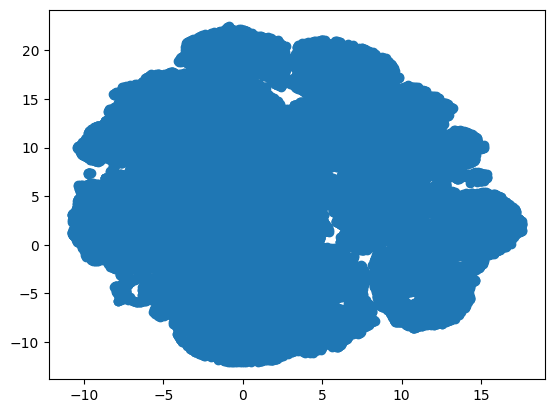

In [39]:
# import umap.plot

# umap.plot.points(mapper)
# umap.plot.connectivity(mapper, show_points=True)
plt.scatter(umap_embeddings[:,0], umap_embeddings[:,1])

2d Scatter and Histogram of umap_embeddings

Text(0.5, 1.0, '2D histogram')

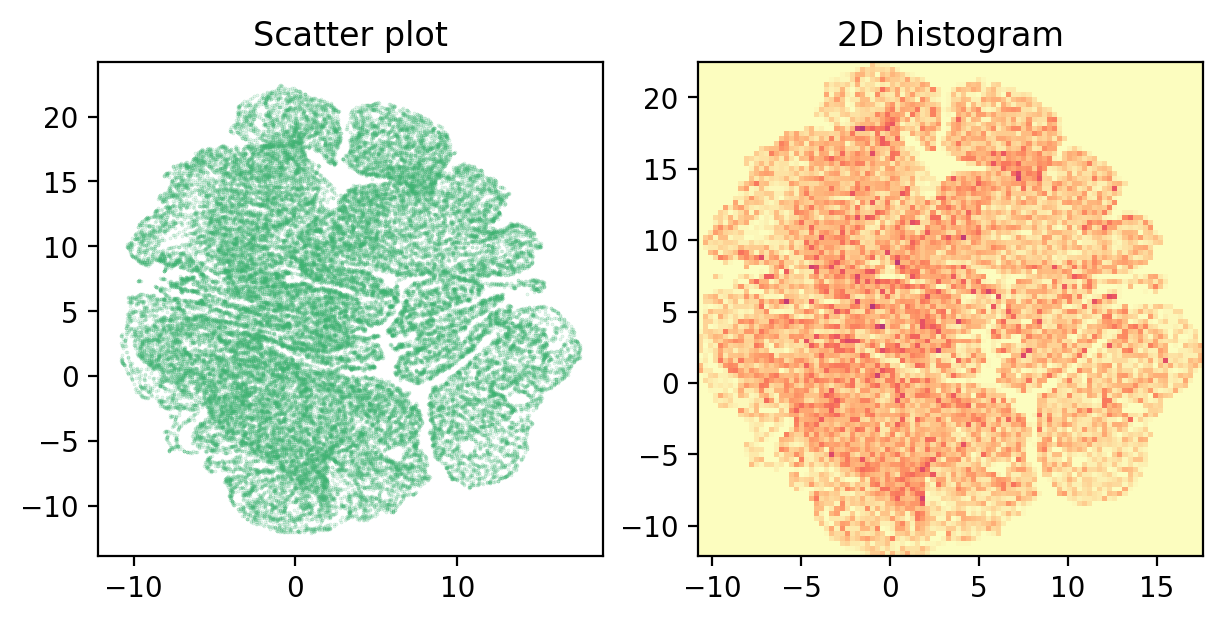

In [40]:
fig = plt.figure(figsize=[6,3], layout='constrained', dpi=200)
spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

# Scatter plot
ax1 = fig.add_subplot(spec[0, 0])
color=matplotlib.colors.colorConverter.to_rgba('mediumseagreen', alpha=.1)
ax1.plot(umap_embeddings[:,0], umap_embeddings[:,1], 'o', markersize=.25, alpha=0.3, color=color, markeredgecolor=color, linewidth=0)
ax1.set_title('Scatter plot')

# 2D histogram
ax2 = fig.add_subplot(spec[0, 1])
histout = np.histogram2d(umap_embeddings[:,0], umap_embeddings[:,1], bins=50)
ax2.hist2d(umap_embeddings[:,0], umap_embeddings[:,1], bins=100, cmap=plt.cm.magma_r, vmax=np.percentile(histout[0], 99))
ax2.set_title('2D histogram')

Send figure to wandb and finish run.

In [99]:
# wandb.log({"UMAP Embeddings (testing)": wandb.Image(fig)})
# wandb.finish()

# Scatter and Histogram of Unprocessed Embeddings (embeddings_inference)

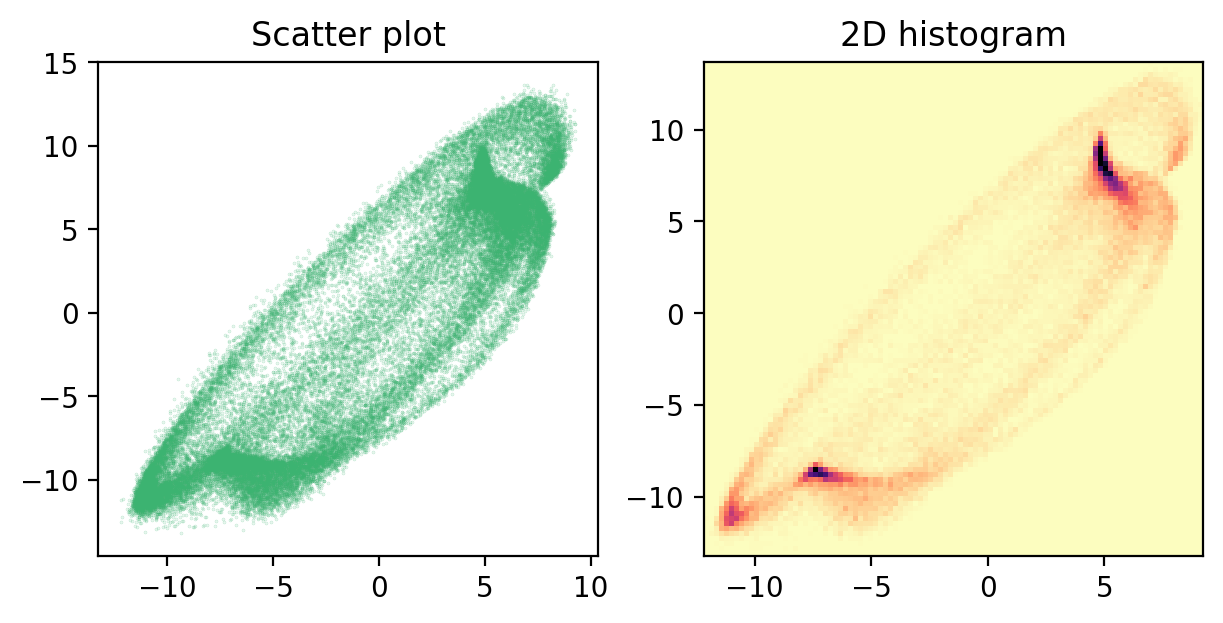

In [41]:
fig2 = plt.figure(figsize=[6,3], layout='constrained', dpi=200)
spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig2)

# Scatter plot
ax1 = fig2.add_subplot(spec[0, 0])
color=matplotlib.colors.colorConverter.to_rgba('mediumseagreen', alpha=.1)
ax1.plot(embeddings_inference[:,0], embeddings_inference[:,1], 'o', markersize=.25, alpha=0.3, color=color, markeredgecolor=color, linewidth=0)
ax1.set_title('Scatter plot')

# 2D histogram
ax2 = fig2.add_subplot(spec[0, 1])
histout = np.histogram2d(embeddings_inference[:,0], embeddings_inference[:,1], bins=50)
ax2.hist2d(embeddings_inference[:,0], embeddings_inference[:,1], bins=100, cmap=plt.cm.magma_r, vmax=np.percentile(histout[0], 99))
ax2.set_title('2D histogram');

Send figure to wandb and finish run

In [42]:
# wandb.log({"Embeddings": wandb.Image(fig2)})
wandb.finish()

# Clustering & visualizing/plotting clusters

Clustering embeddings.

In [43]:
embedding_to_plot = umap_embeddings # umap_embeddings or embeddings_inference

clusterer = hdbscan.HDBSCAN(min_cluster_size=2, gen_min_span_tree=True)
clusterer.fit(embedding_to_plot)

HDBSCAN(gen_min_span_tree=True, min_cluster_size=2)

In [44]:
np.unique(clusterer.labels_)

array([  -1,    0,    1, ..., 8118, 8119, 8120])

In [45]:
sns.color_palette('Paired', clusterer.labels_.max()+1)

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392),
 (0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392),
 (0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392),
 (0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392),
 (0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392),
 (0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392),
 (0.6509803921568628, 0.807843137254902, 0.890196078431372

In [46]:
clusterer.labels_.max()

8120

Scatter plot umap_embeddings or embeddings_inference with color.

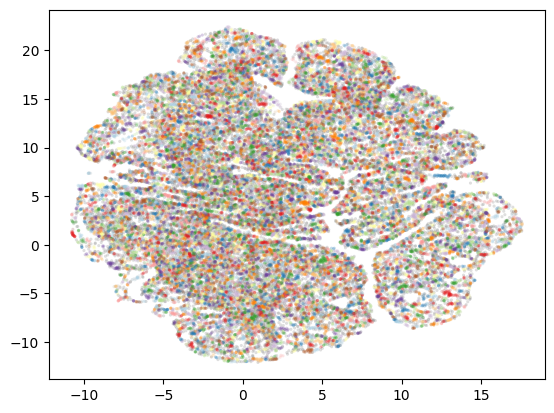

In [47]:
color_palette = sns.color_palette('Paired', clusterer.labels_.max()+1)
cluster_colors = [color_palette[x] if x >= 0 else (0.5, 0.5, 0.5) for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in zip(cluster_colors, clusterer.probabilities_)]

plt.scatter(embedding_to_plot[:,0], embedding_to_plot[:,1], s=5, linewidth=0, c=cluster_member_colors, alpha=0.25)

In [ ]:
# wandb.log({"UMAP Embeddings": wandb.Image(plt.scatter(embedding_to_plot[:,0], embedding_to_plot[:,1], s=5, linewidth=0, c=cluster_member_colors, alpha=0.25))})
# wandb.finish()

# Cluster images.

In [48]:
from search_utils.image_utils import read_image

Define cluster_plot function.

In [49]:
def cluster_plot(cluster_rows:int, cluster_col:int, images_list:np.array, dpi:int):
  fig = plt.figure(figsize=[cluster_col, cluster_rows], layout='constrained', dpi=dpi)
  spec = gridspec.GridSpec(ncols=cluster_col, nrows=cluster_rows, figure=fig, wspace=0, hspace=0)

  # Shuffle list and use first 16 filepaths to plot images
  np.random.shuffle(images_list)

  # For loop to go through and use Team Yellow's load image module
  n = 0
  for j in range(cluster_rows):
    for i in range(cluster_col):
      if images_list.shape[0] > n:
        image = read_image(image_loc = images_list[n], image_format = "jpg")
        # Scatter plot
        ax1 = fig.add_subplot(spec[j, i])
        ax1.imshow(image)
        ax1.set_xticks([])
        ax1.set_yticks([])
      else:
        break
      n += 1

Return a chosen cluster.

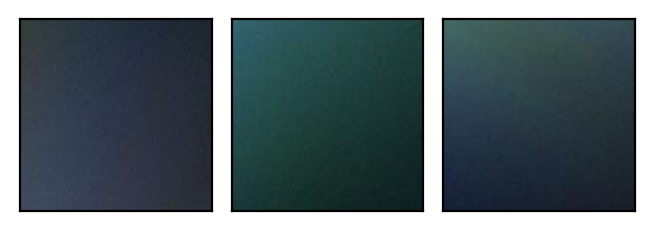

In [50]:
cluster_n = 50
cluster_plot(cluster_rows=2,
             cluster_col=10,
             images_list=returned_images[clusterer.labels_==cluster_n],
             dpi=200)

Returned a randomized set of clusters.

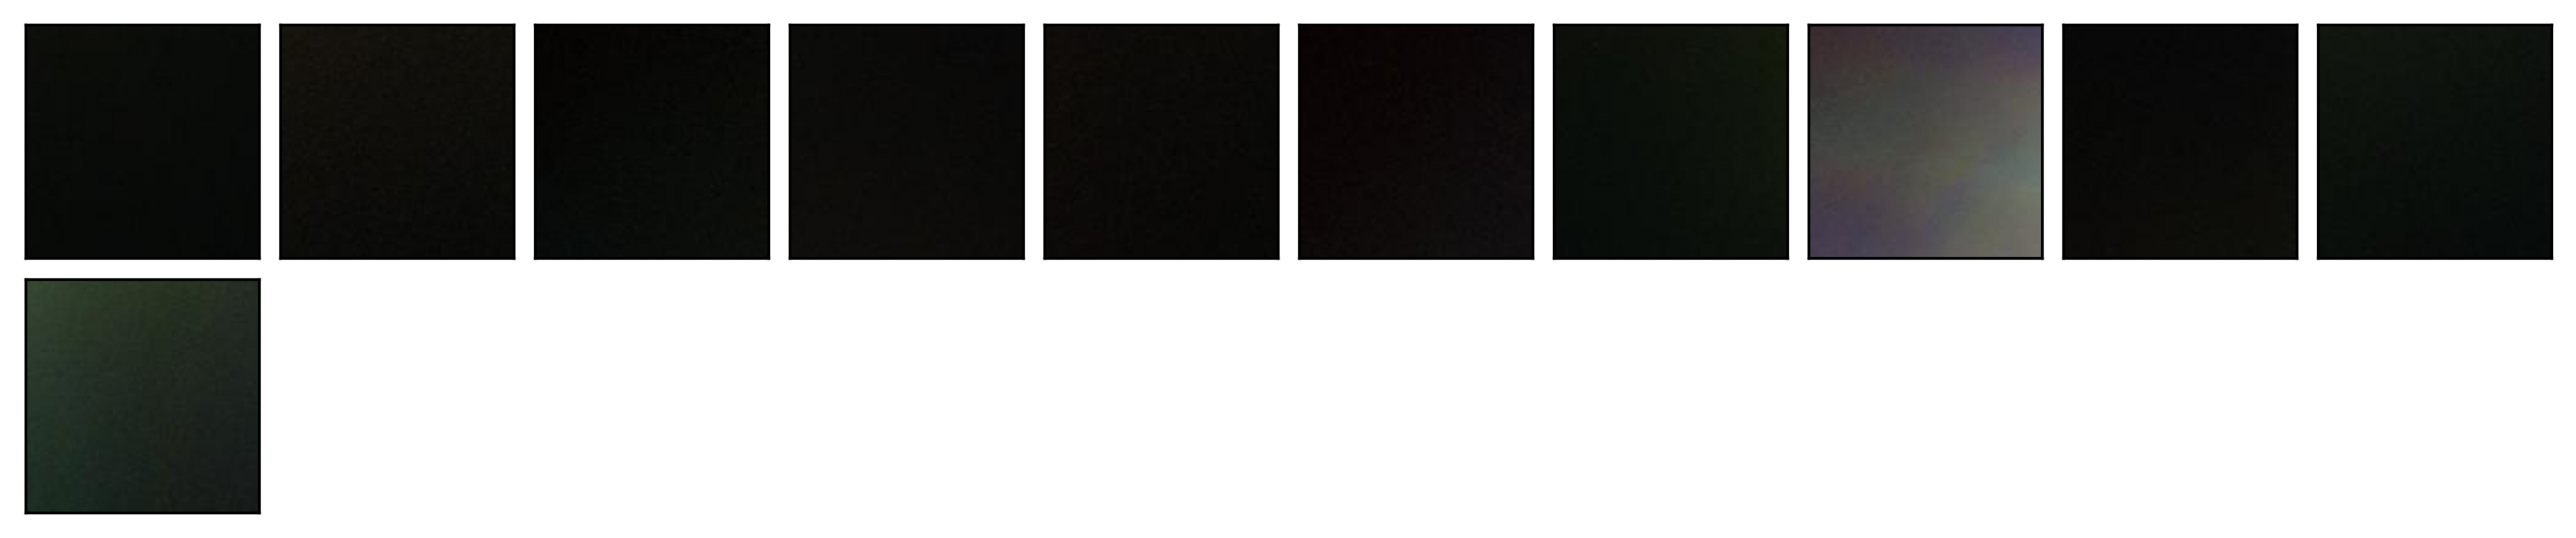

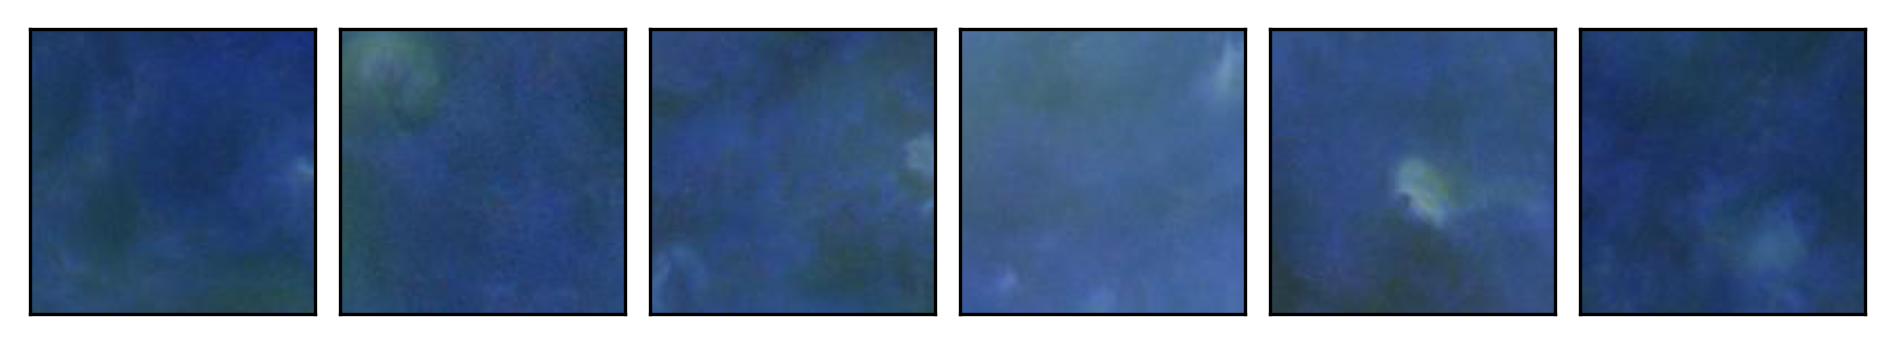

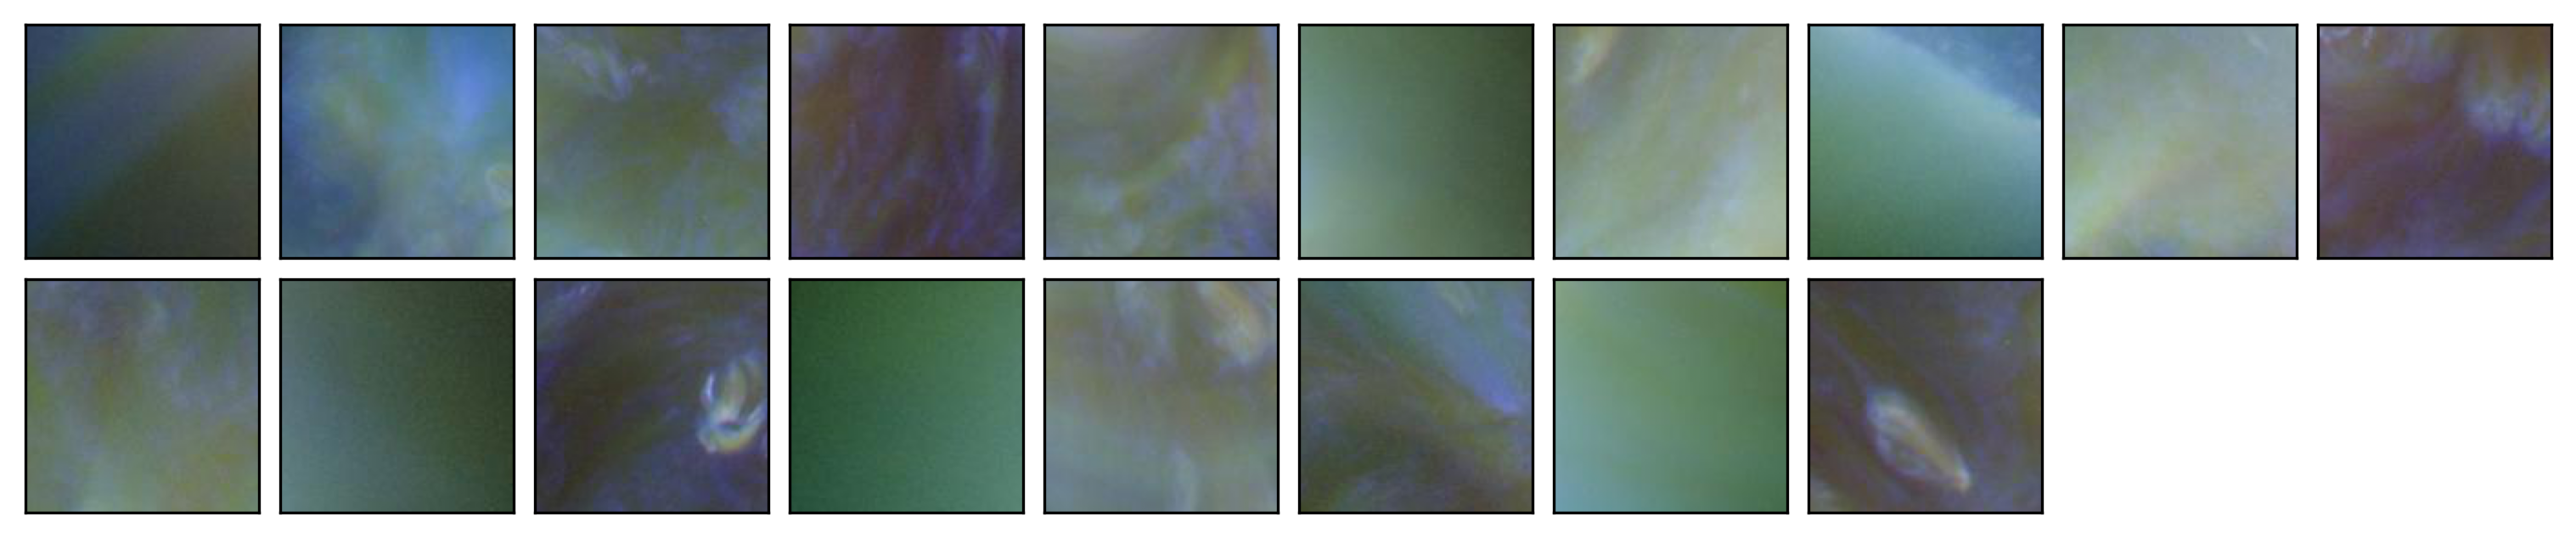

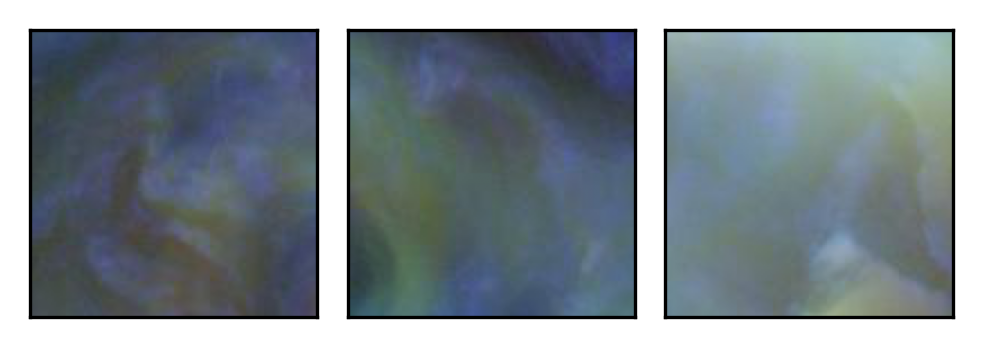

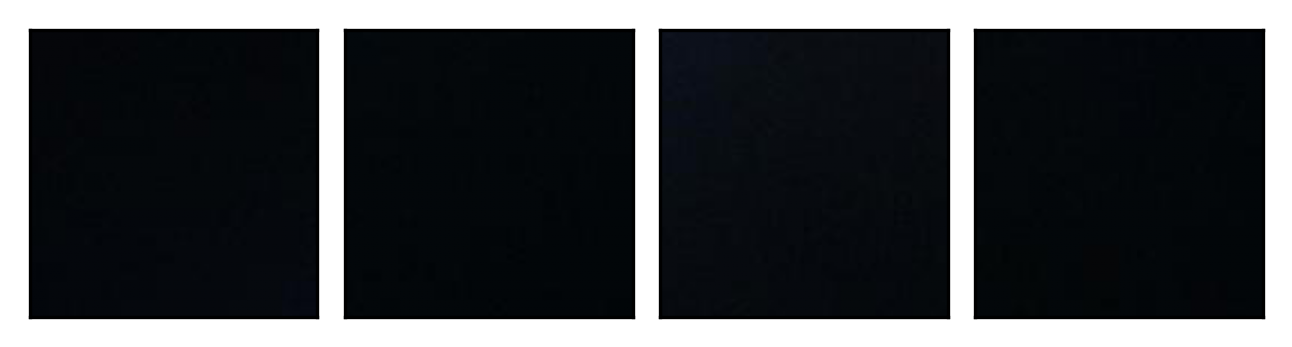

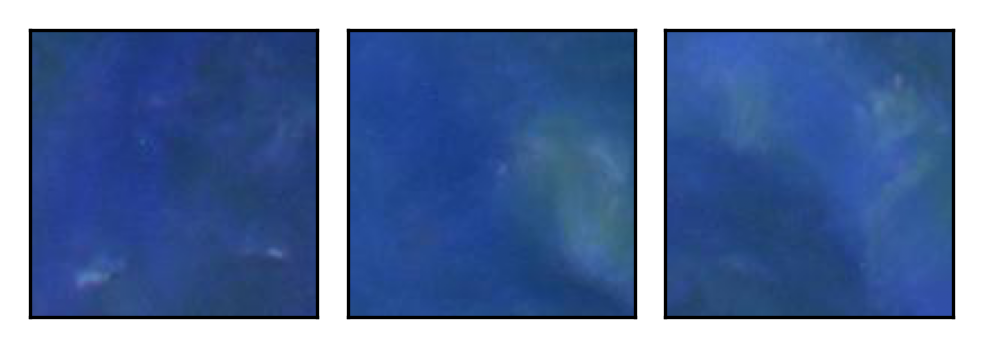

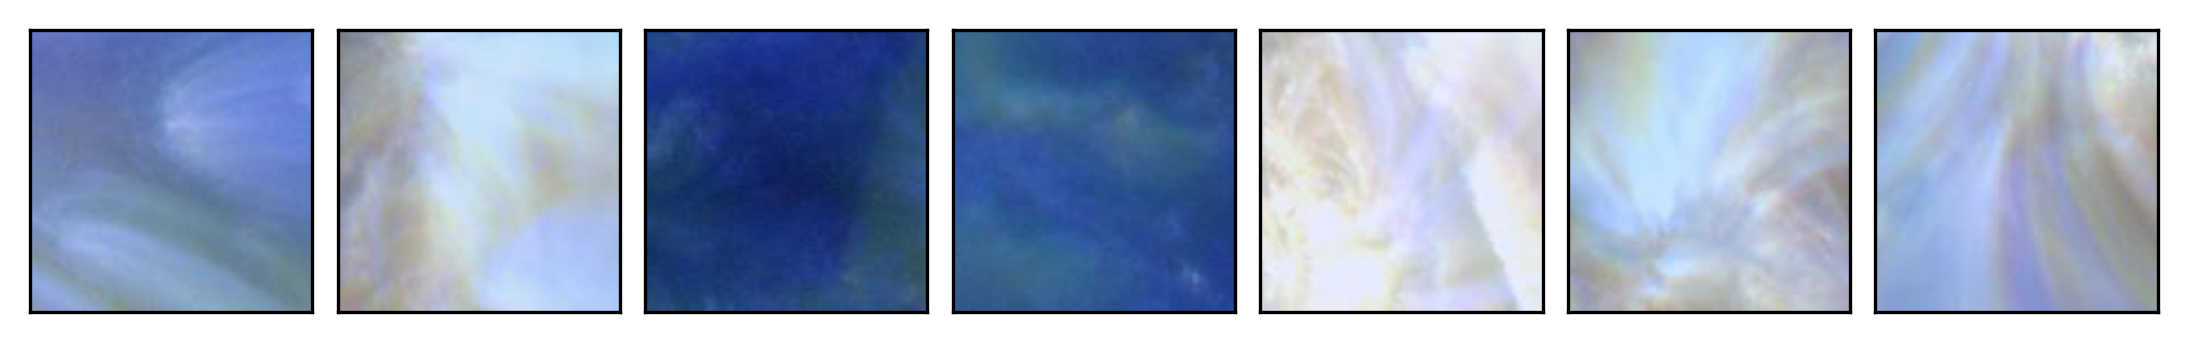

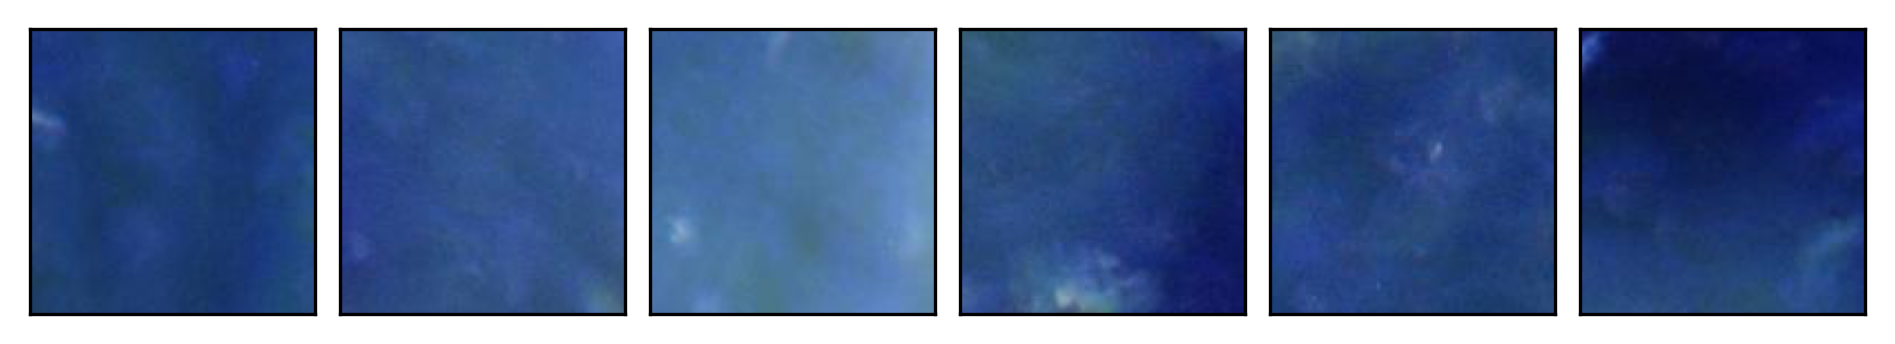

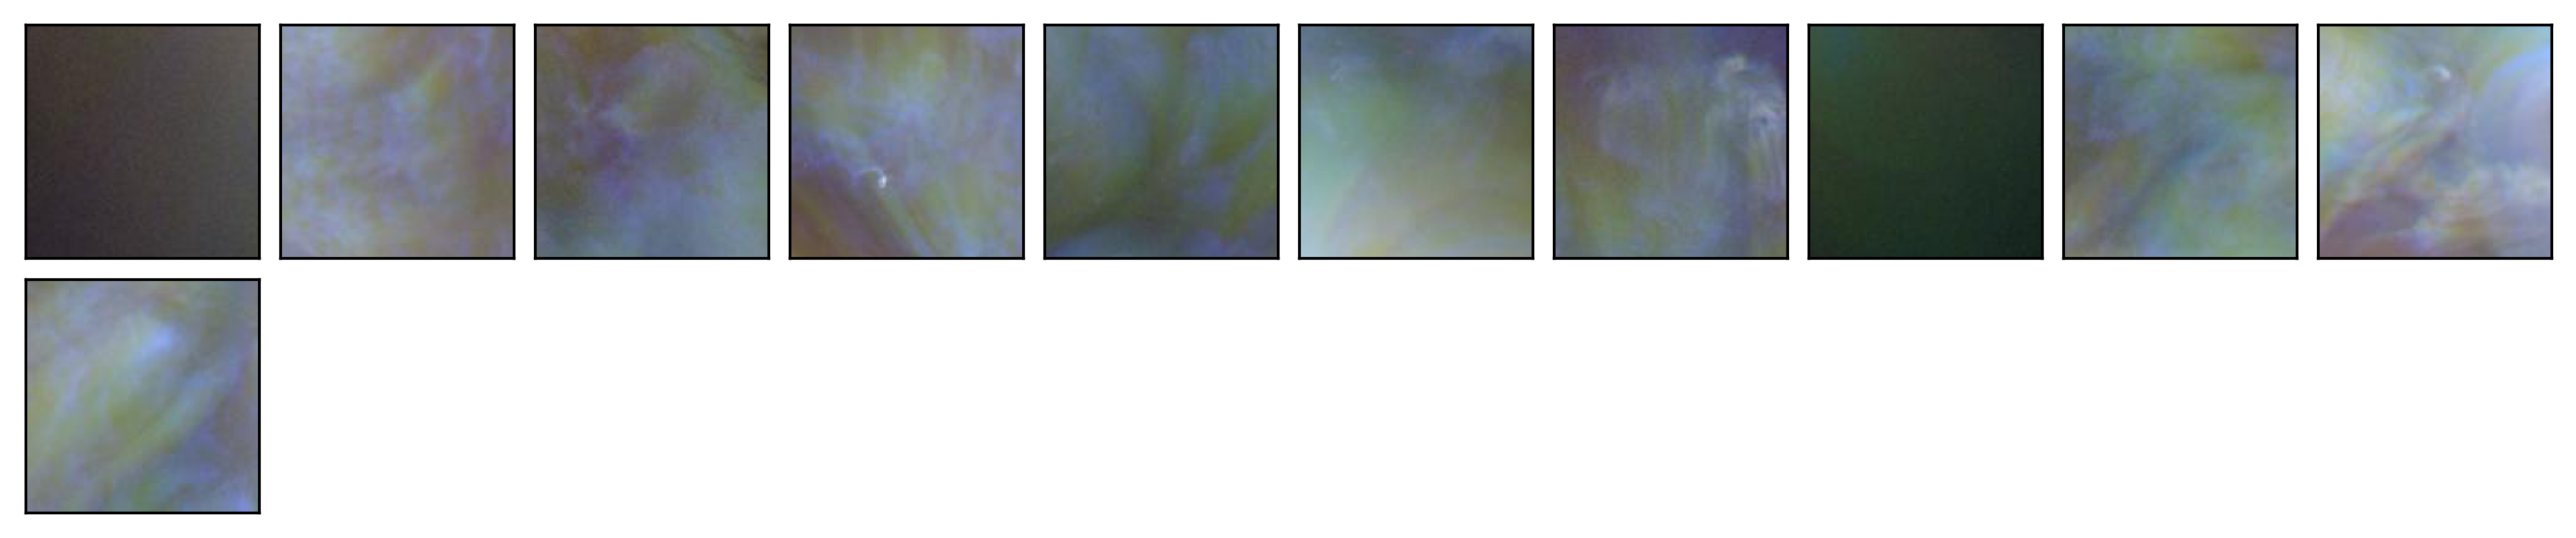

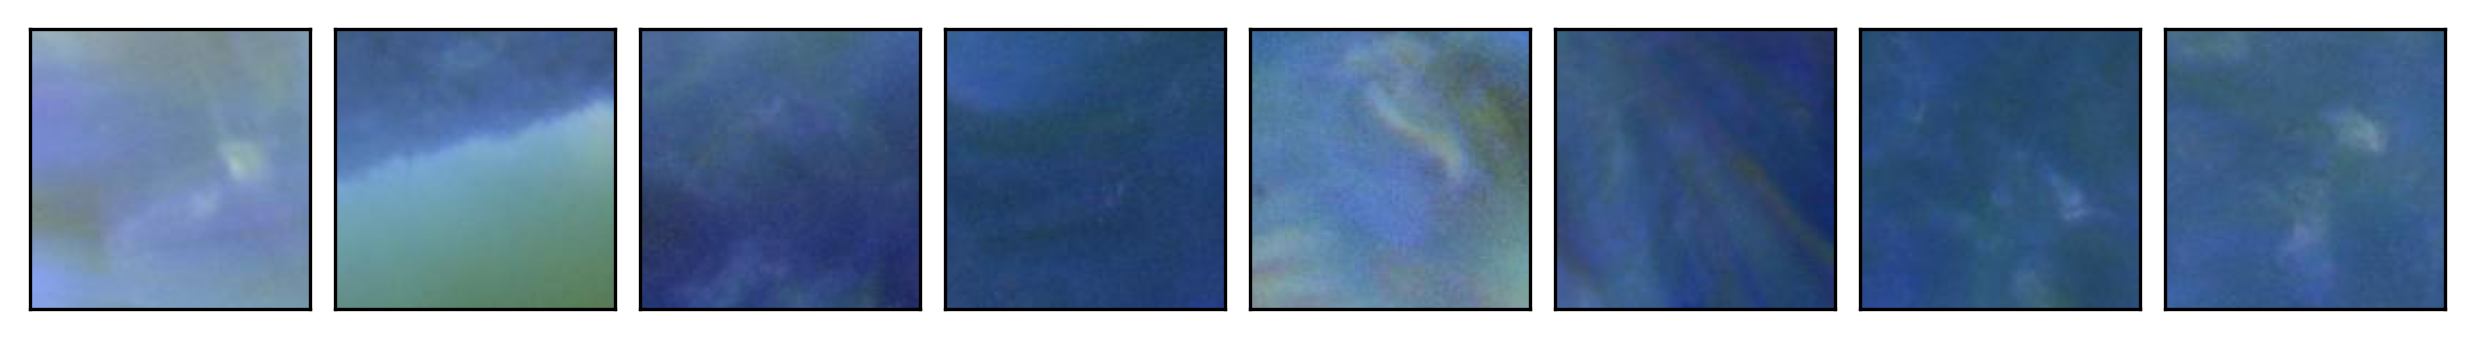

In [51]:
# Loop through all cluster labels
n_clusters_2_plot = 10

# Create a random draw of integers between a range
clusters_2_plot = np.random.choice(clusterer.labels_[clusterer.labels_ >= 0],
                                   size=n_clusters_2_plot,
                                   replace=False)

for cluster in clusters_2_plot:
  cluster_plot(cluster_rows=2,
               cluster_col=10,
               images_list=returned_images[clusterer.labels_==cluster],
               dpi=300)

<Axes: ylabel='$\\lambda$ value'>

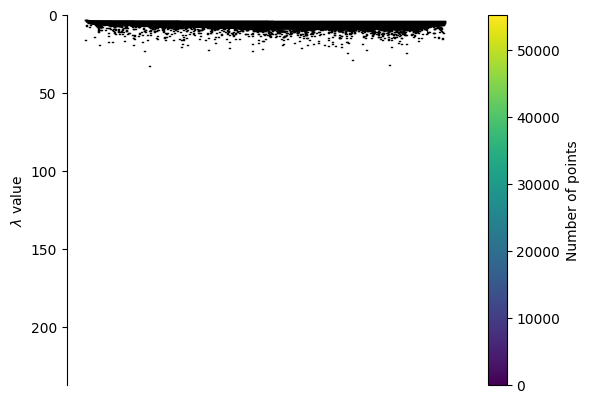

In [52]:
clusterer.condensed_tree_.plot()